## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [2]:
import pandas as pd
from pathlib import Path


cts = pd.read_csv('20240828_TS_iDEC.txt', sep='\t', header=1)[['Pos', 'Cp']]
layout_plate = pd.read_excel('plate_template_28_08.xlsx', header=None)





In [3]:
cts = cts.rename(columns={'Pos': 'well', 'Cp': 'cp'})
cts = cts.set_index('well').cp
cts = list_to_plate(cts)
cts


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,9.85,11.20,11.49,NaN,10.79,NaN,11.49,10.07,NaN,NaN,...,24.21,24.87,27.32,31.49,NaN,NaN,NaN,NaN,NaN,31.40
B,11.24,13.23,12.59,12.55,NaN,12.83,NaN,12.29,NaN,30.41,...,24.31,24.91,27.27,31.47,NaN,NaN,NaN,NaN,NaN,31.49
C,11.04,10.53,10.29,NaN,10.25,NaN,NaN,NaN,NaN,NaN,...,24.53,25.24,26.95,31.49,NaN,NaN,NaN,NaN,NaN,31.20
D,11.54,12.12,10.60,11.79,12.11,10.79,10.48,NaN,NaN,30.40,...,24.47,24.99,27.32,30.49,NaN,NaN,NaN,NaN,NaN,8.79
E,12.27,11.03,11.47,11.63,11.88,11.64,11.37,10.29,NaN,15.77,...,24.46,25.16,26.64,30.65,NaN,NaN,NaN,NaN,NaN,8.58
F,13.29,13.05,12.44,12.86,13.57,12.92,12.42,11.99,NaN,30.27,...,24.31,24.64,26.20,30.62,NaN,NaN,NaN,NaN,NaN,8.79
G,12.66,NaN,10.81,NaN,11.09,12.49,10.90,12.15,NaN,15.40,...,8.53,8.15,10.14,30.67,NaN,NaN,NaN,NaN,NaN,30.29
H,13.55,13.48,12.92,NaN,14.50,14.29,13.06,11.53,NaN,30.25,...,8.21,8.06,9.97,30.80,NaN,NaN,NaN,NaN,NaN,30.54
I,10.61,10.42,11.23,11.21,12.06,10.11,10.33,11.33,NaN,15.02,...,25.07,24.74,27.88,30.70,NaN,NaN,NaN,NaN,NaN,30.56
J,14.51,13.37,13.55,15.09,14.35,13.88,12.57,12.64,NaN,30.40,...,25.23,24.79,27.77,30.70,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import numpy as np
cts1 = plate_to_list(set_plate_axes(cts.iloc[::2, 14:17].T)).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts1['qpcr replicate'] = 'rep1'
cts2 = plate_to_list(set_plate_axes(cts.iloc[1::2, 14:17].T)).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts2['qpcr replicate'] = 'rep2'
cts_all = pd.concat([cts1, cts2])
cts_all

,well,cp,qpcr replicate
0,A1,24.21,rep1
1,A2,24.53,rep1
2,A3,24.46,rep1
3,A4,8.53,rep1
4,A5,25.07,rep1
5,A6,25.31,rep1
6,A7,29.23,rep1
7,A8,29.24,rep1
8,B1,24.87,rep1
9,B2,25.24,rep1


In [5]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta = parse_layout(layout_plate).reset_index().rename(columns={'index': 'well'})
meta = meta.rename(columns={'Phage': 'phage', 'Strain.Format:strain-AP1-AP2e.g.S2060-2008-1095.LBforNC,S2208forPC': 'strain'})
for col in meta.columns:
  meta[col] = meta[col].str.strip()

meta

                  1                  2                  3      4    5    6   \
A  pES2008 S2060+DP6  pES2008 S2060+DP6  pES2008 S2060+DP6  S2208   LB   LB   
B  pES2008 S2060+DP6  pES2008 S2060+DP6  pES2008 S2060+DP6  S2208   LB   LB   
C  pES2008 S2060+DP6  pES2008 S2060+DP6  pES2008 S2060+DP6  S2208   LB   LB   
D                NaN                NaN                NaN    NaN  NaN  NaN   
E                NaN                NaN                NaN    NaN  NaN  NaN   
F                NaN                NaN                NaN    NaN  NaN  NaN   
G                NaN                NaN                NaN    NaN  NaN  NaN   
H                NaN                NaN                NaN    NaN  NaN  NaN   

                  7                  8   9   10  11  12  
A  pES2008 S2060+DP6  pES2008 S2060+DP6 NaN NaN NaN NaN  
B                 LB                 LB NaN NaN NaN NaN  
C                NaN                NaN NaN NaN NaN NaN  
D                NaN                NaN NaN NaN NaN NaN 

,well,Strain,phage
0,A1,pES2008 S2060+DP6,SIAH1
1,A2,pES2008 S2060+DP6,SIAH1
2,A3,pES2008 S2060+DP6,SIAH1
3,A4,S2208,SIAH1
4,A5,LB,SIAH1
5,A6,LB,SIAH1
6,A7,pES2008 S2060+DP6,NaN
7,A8,pES2008 S2060+DP6,NaN
8,B1,pES2008 S2060+DP6,SIAH2
9,B2,pES2008 S2060+DP6,SIAH2


In [6]:
df = pd.merge(cts_all, meta, on='well')
df

,well,cp,qpcr replicate,Strain,phage
0,A1,24.21,rep1,pES2008 S2060+DP6,SIAH1
1,A2,24.53,rep1,pES2008 S2060+DP6,SIAH1
2,A3,24.46,rep1,pES2008 S2060+DP6,SIAH1
3,A4,8.53,rep1,S2208,SIAH1
4,A5,25.07,rep1,LB,SIAH1
5,A6,25.31,rep1,LB,SIAH1
6,A7,29.23,rep1,pES2008 S2060+DP6,NaN
7,A8,29.24,rep1,pES2008 S2060+DP6,NaN
8,B1,24.87,rep1,pES2008 S2060+DP6,SIAH2
9,B2,25.24,rep1,pES2008 S2060+DP6,SIAH2


## qPCR Replicate correlation

In [7]:
replicate_correlation = df.groupby(['well']).cp.std()
good_replicates = replicate_correlation[replicate_correlation < 2].reset_index()
#df.merge(good_replicates, on=['well'], how='right')
df = df.groupby(['well']).first()
good_replicates

,well,cp
0,A1,0.070711
1,A2,0.042426
2,A3,0.106066
3,A4,0.226274
4,A5,0.113137
5,A6,0.028284
6,A7,0.028284
7,A8,0.035355
8,B1,0.028284
9,B2,0.176777


## Compute Propagation

In [8]:
df

,cp,qpcr replicate,Strain,phage
well,,,,
A1,24.21,rep1,pES2008 S2060+DP6,SIAH1
A2,24.53,rep1,pES2008 S2060+DP6,SIAH1
A3,24.46,rep1,pES2008 S2060+DP6,SIAH1
A4,8.53,rep1,S2208,SIAH1
A5,25.07,rep1,LB,SIAH1
A6,25.31,rep1,LB,SIAH1
A7,29.23,rep1,pES2008 S2060+DP6,None
A8,29.24,rep1,pES2008 S2060+DP6,None
B1,24.87,rep1,pES2008 S2060+DP6,SIAH2


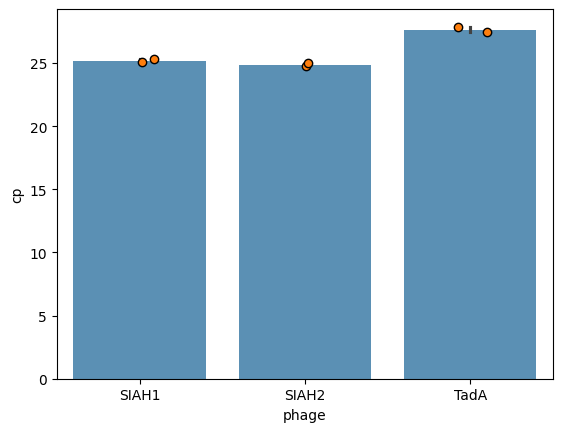

In [9]:
import seaborn as sns

_ = bars(df[df.Strain == 'LB'], x='phage', y='cp')

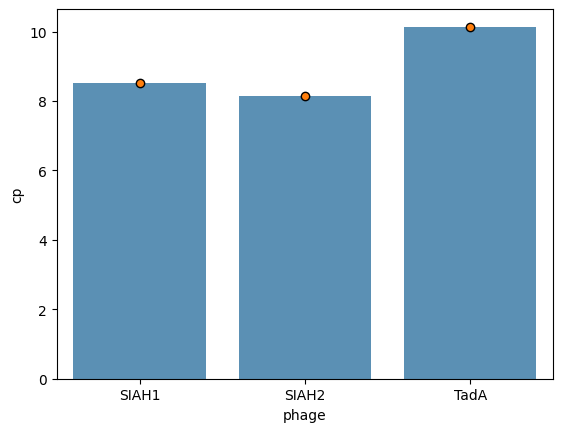

In [10]:
_ = bars(df[df.Strain == 'S2208'], x='phage', y='cp')

In [11]:
df['cp_init'] = pd.NA
for phage in df.phage.unique():
  df.loc[df.phage == phage, 'cp_init'] = df[(df.phage == phage) & (df.Strain == 'LB')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,cp,qpcr replicate,Strain,phage,cp_init,fc_log2,fc
well,,,,,,,
A1,24.21,rep1,pES2008 S2060+DP6,SIAH1,25.19,0.98,1.972465
A2,24.53,rep1,pES2008 S2060+DP6,SIAH1,25.19,0.66,1.580083
A3,24.46,rep1,pES2008 S2060+DP6,SIAH1,25.19,0.73,1.658639
A4,8.53,rep1,S2208,SIAH1,25.19,16.66,103552.294829
A5,25.07,rep1,LB,SIAH1,25.19,0.12,1.086735
A6,25.31,rep1,LB,SIAH1,25.19,-0.12,0.920188
A7,29.23,rep1,pES2008 S2060+DP6,None,<NA>,<NA>,<NA>
A8,29.24,rep1,pES2008 S2060+DP6,None,<NA>,<NA>,<NA>
B1,24.87,rep1,pES2008 S2060+DP6,SIAH2,24.885,0.015,1.010451


In [12]:
df.phage.unique()

array(['SIAH1', None, 'SIAH2', 'TadA'], dtype=object)

## Results


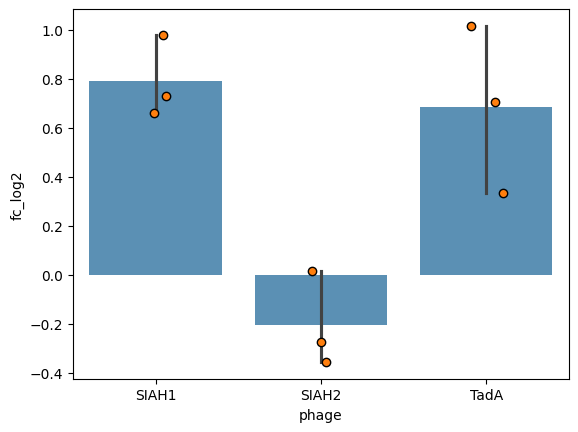

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

_ = bars(df[(df.Strain == 'pES2008 S2060+DP6') & (~df.phage.isna())], x='phage', y='fc_log2')

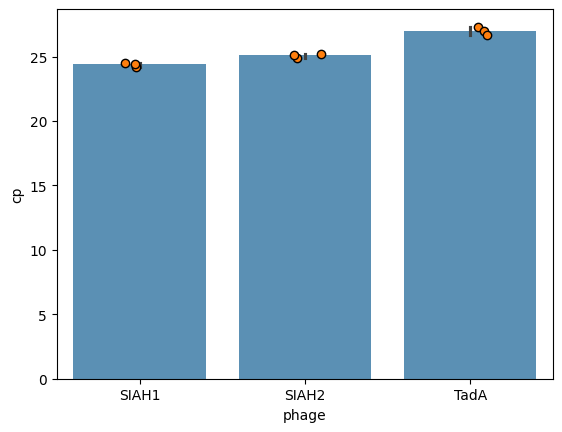

In [14]:
_ = bars(df[(df.Strain == 'pES2008 S2060+DP6') & (~df.phage.isna())], x='phage', y='cp')

/var/folders/5b/cl1vpvwx7z12hpb0ntpgryk40000gp/T/ipykernel_92493/321632514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cterm_rnap.Strain = d_cterm_rnap.Strain.map({'pES2008 S2060+DP6': 'no Cterm-RNAP', 'S2208': 'PC'})
/var/folders/5b/cl1vpvwx7z12hpb0ntpgryk40000gp/T/ipykernel_92493/321632514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cterm_rnap.phage = d_cterm_rnap.phage.map({'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'TadA': 'UN-SP'})


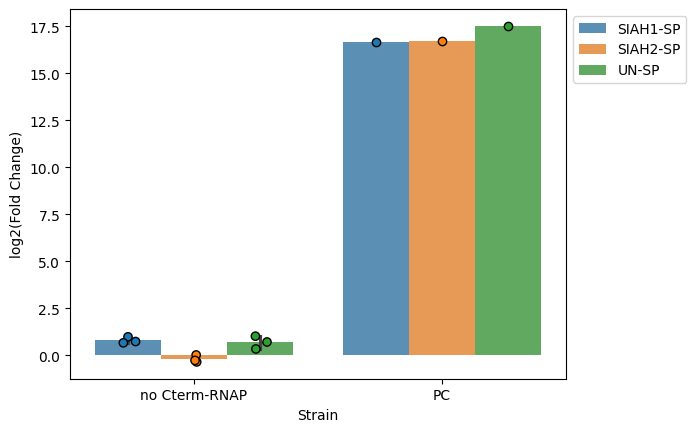

In [17]:
d_cterm_rnap = df[(df.Strain == 'pES2008 S2060+DP6') | (df.Strain == 'S2208')]
d_cterm_rnap.Strain = d_cterm_rnap.Strain.map({'pES2008 S2060+DP6': 'no Cterm-RNAP', 'S2208': 'PC'})
d_cterm_rnap.phage = d_cterm_rnap.phage.map({'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'TadA': 'UN-SP'})
d_cterm_rnap  = d_cterm_rnap.rename(columns={'fc_log2': 'log2(Fold Change)'})
ax = bars(d_cterm_rnap, x='Strain', y='log2(Fold Change)', hue='phage', order=['no Cterm-RNAP', 'PC'])
plt.savefig('../figs/20240828_fig4A.pdf', format='pdf')

In [18]:
d_cterm_rnap[(d_cterm_rnap.Strain == 'no Cterm-RNAP')]

,cp,qpcr replicate,Strain,phage,cp_init,log2(Fold Change),fc
well,,,,,,,
A1,24.21,rep1,no Cterm-RNAP,SIAH1-SP,25.19,0.98,1.972465
A2,24.53,rep1,no Cterm-RNAP,SIAH1-SP,25.19,0.66,1.580083
A3,24.46,rep1,no Cterm-RNAP,SIAH1-SP,25.19,0.73,1.658639
A7,29.23,rep1,no Cterm-RNAP,NaN,<NA>,<NA>,<NA>
A8,29.24,rep1,no Cterm-RNAP,NaN,<NA>,<NA>,<NA>
B1,24.87,rep1,no Cterm-RNAP,SIAH2-SP,24.885,0.015,1.010451
B2,25.24,rep1,no Cterm-RNAP,SIAH2-SP,24.885,-0.355,0.78187
B3,25.16,rep1,no Cterm-RNAP,SIAH2-SP,24.885,-0.275,0.82645
C1,27.32,rep1,no Cterm-RNAP,UN-SP,27.655,0.335,1.261377
